<a href="https://www.kaggle.com/code/lalit7881/campus-placement-prediction-model-accuracy-85-8?scriptVersionId=296665964" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/campus-placement-prediction/campus_placement_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/campus-placement-prediction/campus_placement_data.csv')
print(f"📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head()

📊 Dataset Shape: 100,000 rows × 26 columns


,student_id,gender,age,city_tier,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_stream,degree_percentage,...,technical_skills_score,soft_skills_score,aptitude_score,communication_score,work_experience_months,leadership_roles,extracurricular_activities,backlogs,placed,salary_lpa
0,STU000001,Male,22,Tier 1,71.01,State,76.76,CBSE,Commerce,64.44,...,6.8,7.8,62.1,6.2,14,1,10,0,1,12.24
1,STU000002,Female,22,Tier 2,58.46,CBSE,57.62,State,Science,68.24,...,4.6,4.8,58.7,7.2,5,1,4,0,1,10.09
2,STU000003,Female,21,Tier 1,67.83,CBSE,65.67,State,Commerce,52.33,...,4.7,5.0,58.9,5.0,30,2,1,0,1,14.94
3,STU000004,Female,21,Tier 2,80.40,CBSE,77.15,State,Science,56.55,...,6.8,7.6,35.0,8.3,31,0,5,0,1,15.49
4,STU000005,Male,21,Tier 1,66.10,State,62.81,ICSE,Science,78.93,...,7.0,5.7,54.0,5.4,24,0,2,0,1,15.13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   student_id                  100000 non-null  object 
 1   gender                      100000 non-null  object 
 2   age                         100000 non-null  int64  
 3   city_tier                   100000 non-null  object 
 4   ssc_percentage              100000 non-null  float64
 5   ssc_board                   100000 non-null  object 
 6   hsc_percentage              100000 non-null  float64
 7   hsc_board                   100000 non-null  object 
 8   hsc_stream                  100000 non-null  object 
 9   degree_percentage           100000 non-null  float64
 10  degree_field                100000 non-null  object 
 11  mba_percentage              100000 non-null  float64
 12  specialization              35035 non-null   object 
 13  internships_cou

In [4]:
df.dtypes

student_id                     object
gender                         object
age                             int64
city_tier                      object
ssc_percentage                float64
ssc_board                      object
hsc_percentage                float64
hsc_board                      object
hsc_stream                     object
degree_percentage             float64
degree_field                   object
mba_percentage                float64
specialization                 object
internships_count               int64
projects_count                  int64
certifications_count            int64
technical_skills_score        float64
soft_skills_score             float64
aptitude_score                float64
communication_score           float64
work_experience_months          int64
leadership_roles                int64
extracurricular_activities      int64
backlogs                        int64
placed                          int64
salary_lpa                    float64
dtype: objec

In [5]:
df.shape

(100000, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   student_id                  100000 non-null  object 
 1   gender                      100000 non-null  object 
 2   age                         100000 non-null  int64  
 3   city_tier                   100000 non-null  object 
 4   ssc_percentage              100000 non-null  float64
 5   ssc_board                   100000 non-null  object 
 6   hsc_percentage              100000 non-null  float64
 7   hsc_board                   100000 non-null  object 
 8   hsc_stream                  100000 non-null  object 
 9   degree_percentage           100000 non-null  float64
 10  degree_field                100000 non-null  object 
 11  mba_percentage              100000 non-null  float64
 12  specialization              35035 non-null   object 
 13  internships_cou

In [7]:
df.isnull().sum()

student_id                        0
gender                            0
age                               0
city_tier                         0
ssc_percentage                    0
ssc_board                         0
hsc_percentage                    0
hsc_board                         0
hsc_stream                        0
degree_percentage                 0
degree_field                      0
mba_percentage                    0
specialization                64965
internships_count                 0
projects_count                    0
certifications_count              0
technical_skills_score            0
soft_skills_score                 0
aptitude_score                    0
communication_score               0
work_experience_months            0
leadership_roles                  0
extracurricular_activities        0
backlogs                          0
placed                            0
salary_lpa                        0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

student_id                    100000
gender                             3
age                                9
city_tier                          3
ssc_percentage                  5872
ssc_board                          3
hsc_percentage                  5977
hsc_board                          3
hsc_stream                         3
degree_percentage               5501
degree_field                       5
mba_percentage                  3970
specialization                     3
internships_count                  6
projects_count                    11
certifications_count               9
technical_skills_score            91
soft_skills_score                 91
aptitude_score                   983
communication_score               91
work_experience_months            37
leadership_roles                   6
extracurricular_activities        11
backlogs                          11
placed                             2
salary_lpa                      1620
dtype: int64

In [10]:
df.columns

Index(['student_id', 'gender', 'age', 'city_tier', 'ssc_percentage',
       'ssc_board', 'hsc_percentage', 'hsc_board', 'hsc_stream',
       'degree_percentage', 'degree_field', 'mba_percentage', 'specialization',
       'internships_count', 'projects_count', 'certifications_count',
       'technical_skills_score', 'soft_skills_score', 'aptitude_score',
       'communication_score', 'work_experience_months', 'leadership_roles',
       'extracurricular_activities', 'backlogs', 'placed', 'salary_lpa'],
      dtype='object')

## Data visualizations

In [11]:
df['placed'] = df['placed'].astype(int)

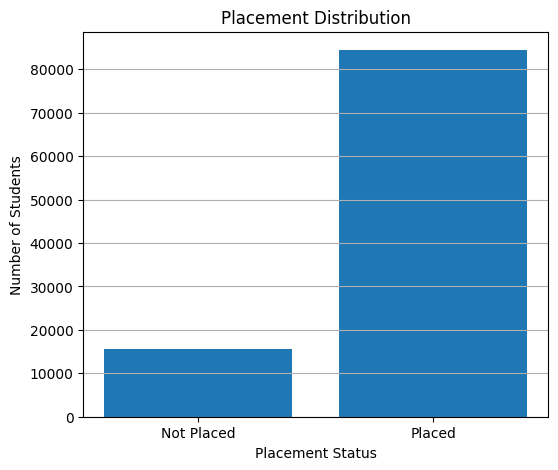

In [12]:
plt.figure(figsize=(6, 5))
plt.bar(['Not Placed', 'Placed'], df['placed'].value_counts().sort_index())
plt.title("Placement Distribution")
plt.xlabel("Placement Status")
plt.ylabel("Number of Students")
plt.grid(axis='y')
plt.show()


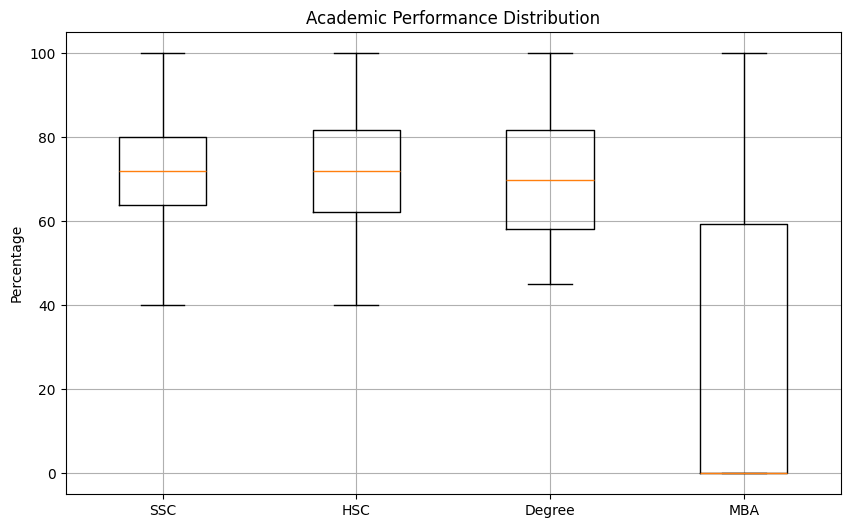

In [13]:
plt.figure(figsize=(10, 6))
plt.boxplot([
    df['ssc_percentage'],
    df['hsc_percentage'],
    df['degree_percentage'],
    df['mba_percentage']
])

plt.xticks([1, 2, 3, 4], ['SSC', 'HSC', 'Degree', 'MBA'])
plt.title("Academic Performance Distribution")
plt.ylabel("Percentage")
plt.grid(True)
plt.show()


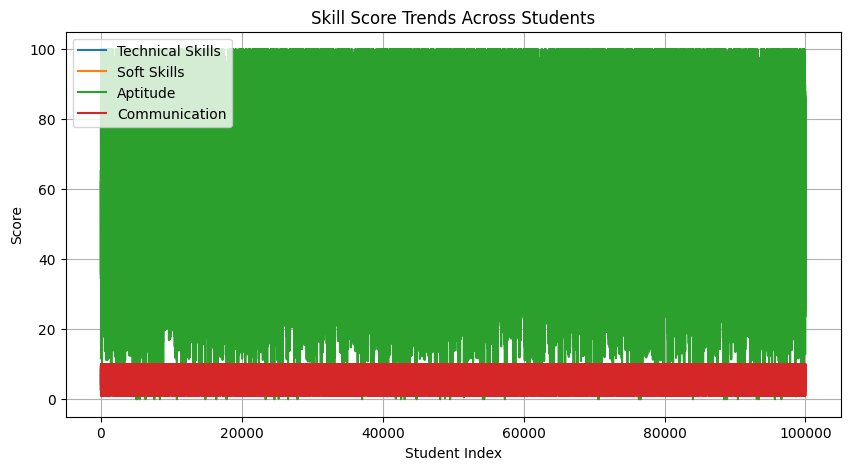

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(df['technical_skills_score'], label='Technical Skills')
plt.plot(df['soft_skills_score'], label='Soft Skills')
plt.plot(df['aptitude_score'], label='Aptitude')
plt.plot(df['communication_score'], label='Communication')

plt.title("Skill Score Trends Across Students")
plt.xlabel("Student Index")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


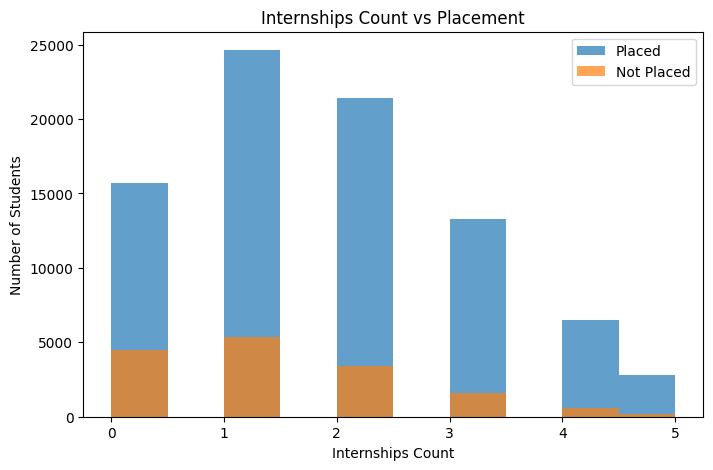

In [15]:
placed = df[df['placed'] == 1]
not_placed = df[df['placed'] == 0]

plt.figure(figsize=(8, 5))
plt.hist(placed['internships_count'], bins=10, alpha=0.7, label='Placed')
plt.hist(not_placed['internships_count'], bins=10, alpha=0.7, label='Not Placed')

plt.title("Internships Count vs Placement")
plt.xlabel("Internships Count")
plt.ylabel("Number of Students")
plt.legend()
plt.show()


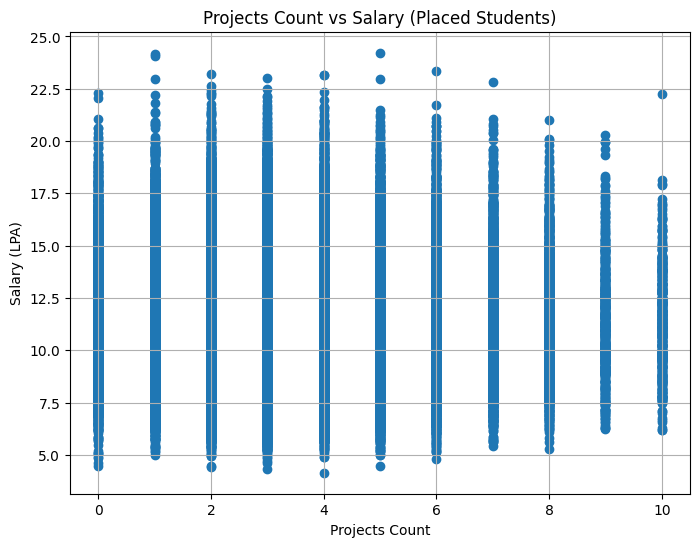

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(
    placed['projects_count'],
    placed['salary_lpa']
)

plt.title("Projects Count vs Salary (Placed Students)")
plt.xlabel("Projects Count")
plt.ylabel("Salary (LPA)")
plt.grid(True)
plt.show()


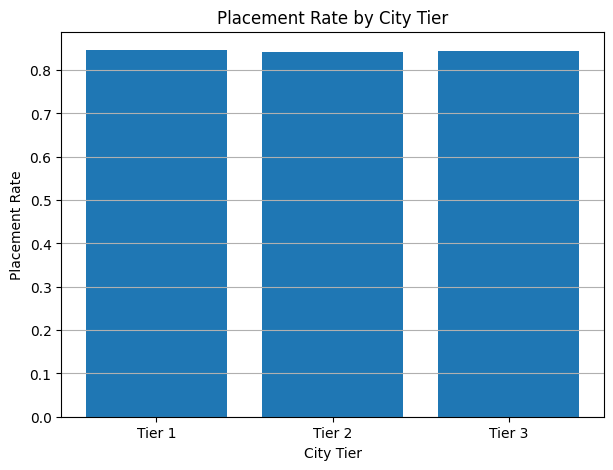

In [17]:
city_placement = df.groupby('city_tier')['placed'].mean()

plt.figure(figsize=(7, 5))
plt.bar(city_placement.index.astype(str), city_placement.values)

plt.title("Placement Rate by City Tier")
plt.xlabel("City Tier")
plt.ylabel("Placement Rate")
plt.grid(axis='y')
plt.show()


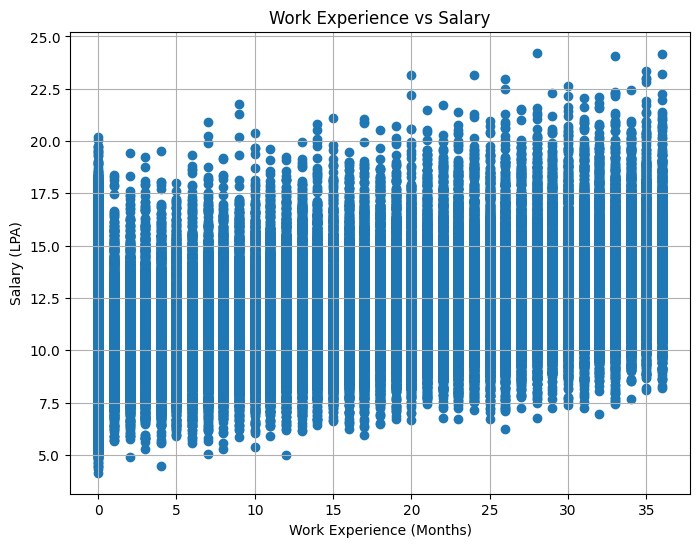

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(
    placed['work_experience_months'],
    placed['salary_lpa']
)

plt.title("Work Experience vs Salary")
plt.xlabel("Work Experience (Months)")
plt.ylabel("Salary (LPA)")
plt.grid(True)
plt.show()


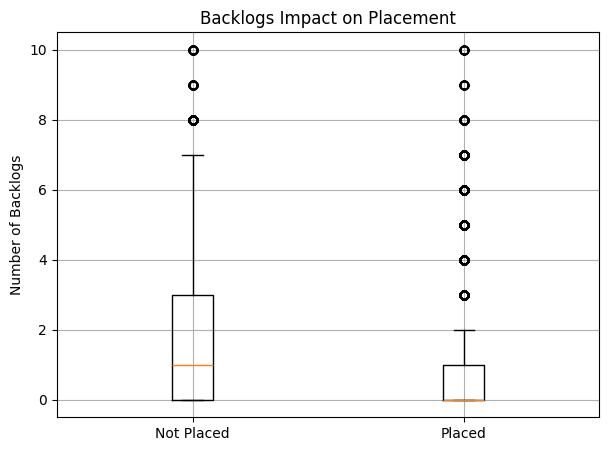

In [19]:
plt.figure(figsize=(7, 5))
plt.boxplot([
    df[df['placed'] == 0]['backlogs'],
    df[df['placed'] == 1]['backlogs']
])

plt.xticks([1, 2], ['Not Placed', 'Placed'])
plt.title("Backlogs Impact on Placement")
plt.ylabel("Number of Backlogs")
plt.grid(True)
plt.show()


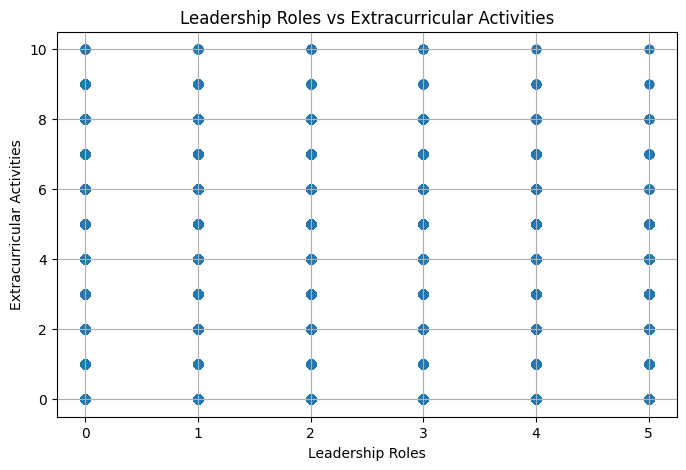

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(
    df['leadership_roles'],
    df['extracurricular_activities']
)

plt.title("Leadership Roles vs Extracurricular Activities")
plt.xlabel("Leadership Roles")
plt.ylabel("Extracurricular Activities")
plt.grid(True)
plt.show()


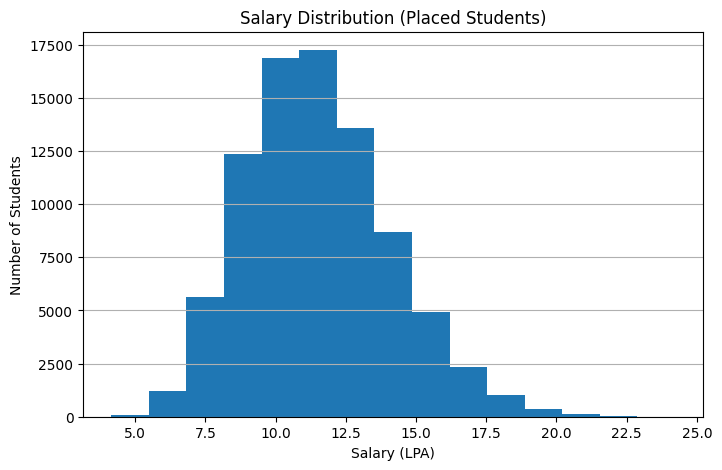

In [21]:
plt.figure(figsize=(8, 5))
plt.hist(placed['salary_lpa'], bins=15)

plt.title("Salary Distribution (Placed Students)")
plt.xlabel("Salary (LPA)")
plt.ylabel("Number of Students")
plt.grid(axis='y')
plt.show()


## Feature engg

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [23]:
categorical_cols = [
    'gender', 'city_tier', 'ssc_board', 'hsc_board',
    'hsc_stream', 'degree_field', 'specialization'
]

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [24]:
X = df.drop(['student_id', 'placed', 'salary_lpa'], axis=1)
y = df['placed']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [26]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}


In [28]:
accuracy_results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    predictions[name] = y_pred

    print(f"\n{name}")
    print("Accuracy:", round(accuracy * 100, 2), "%")



Logistic Regression
Accuracy: 85.8 %

Decision Tree
Accuracy: 78.51 %

Random Forest
Accuracy: 85.58 %

KNN
Accuracy: 83.78 %

SVM
Accuracy: 85.6 %

Naive Bayes
Accuracy: 83.31 %


In [29]:
for name, y_pred in predictions.items():
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{name} - Confusion Matrix")
    print(cm)



Logistic Regression - Confusion Matrix
[[  785  2329]
 [  510 16376]]

Decision Tree - Confusion Matrix
[[ 1082  2032]
 [ 2266 14620]]

Random Forest - Confusion Matrix
[[  586  2528]
 [  357 16529]]

KNN - Confusion Matrix
[[  624  2490]
 [  755 16131]]

SVM - Confusion Matrix
[[  439  2675]
 [  205 16681]]

Naive Bayes - Confusion Matrix
[[ 1443  1671]
 [ 1666 15220]]


In [30]:
for name, y_pred in predictions.items():
    print(f"\n{name} - Classification Report")
    print(classification_report(y_test, y_pred))



Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.61      0.25      0.36      3114
           1       0.88      0.97      0.92     16886

    accuracy                           0.86     20000
   macro avg       0.74      0.61      0.64     20000
weighted avg       0.83      0.86      0.83     20000


Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       0.32      0.35      0.33      3114
           1       0.88      0.87      0.87     16886

    accuracy                           0.79     20000
   macro avg       0.60      0.61      0.60     20000
weighted avg       0.79      0.79      0.79     20000


Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.62      0.19      0.29      3114
           1       0.87      0.98      0.92     16886

    accuracy                           0.86     20000
   ma

In [31]:
accuracy_df = pd.DataFrame({
    "Model": accuracy_results.keys(),
    "Accuracy (%)": [v * 100 for v in accuracy_results.values()]
})

accuracy_df = accuracy_df.sort_values(by="Accuracy (%)", ascending=False)
print(accuracy_df)


                 Model  Accuracy (%)
0  Logistic Regression        85.805
4                  SVM        85.600
2        Random Forest        85.575
3                  KNN        83.775
5          Naive Bayes        83.315
1        Decision Tree        78.510


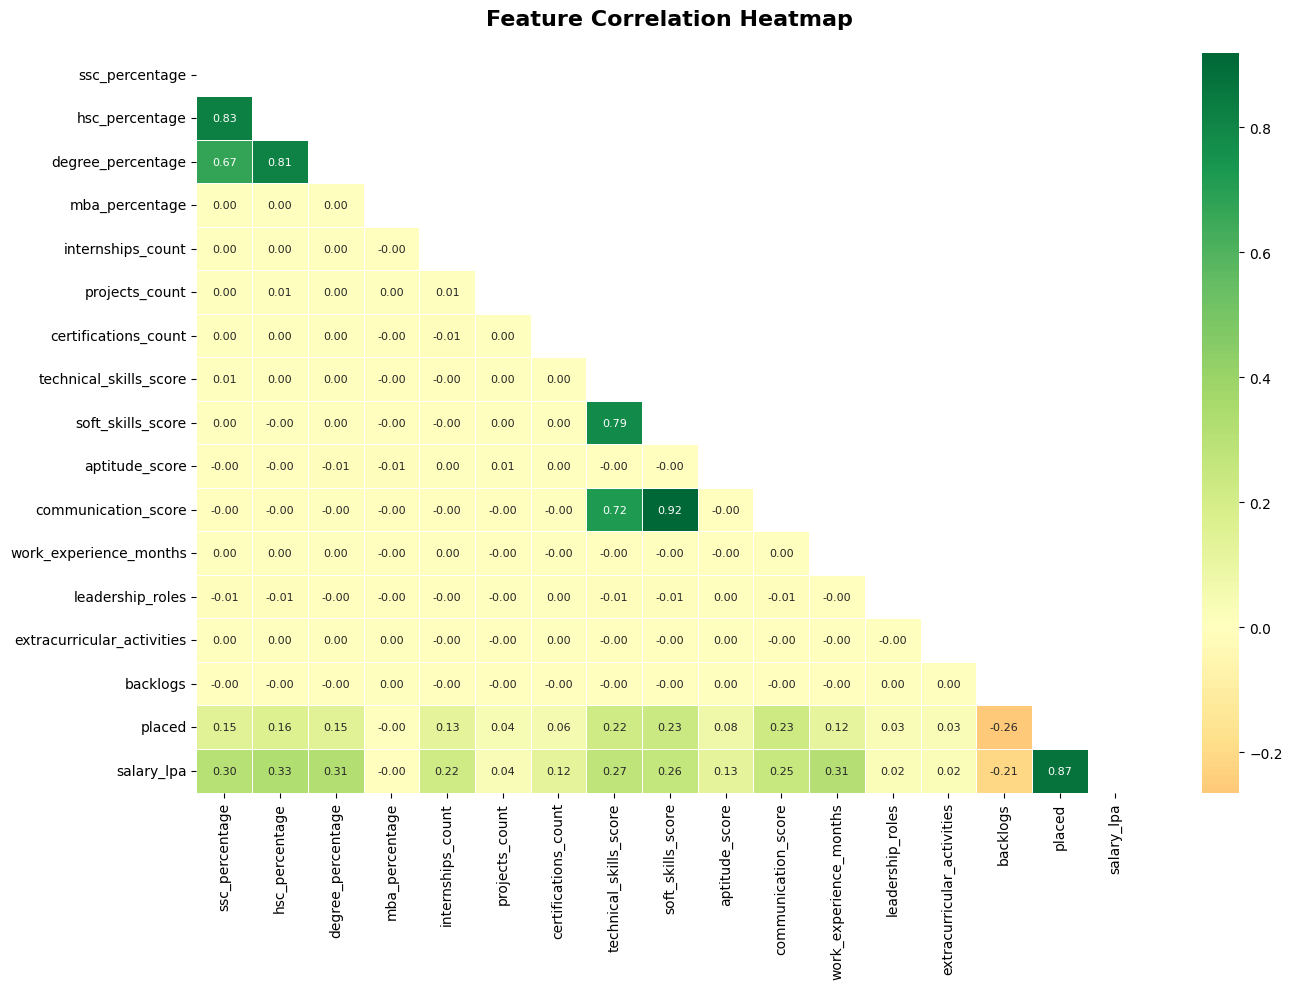

In [32]:
num_cols = ['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'mba_percentage',
            'internships_count', 'projects_count', 'certifications_count',
            'technical_skills_score', 'soft_skills_score', 'aptitude_score', 
            'communication_score', 'work_experience_months', 'leadership_roles',
            'extracurricular_activities', 'backlogs', 'placed', 'salary_lpa']

corr_matrix = df[num_cols].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlGn', center=0, 
            fmt='.2f', linewidths=0.5, annot_kws={'size': 8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [33]:
placement_corr = corr_matrix['placed'].drop(['placed', 'salary_lpa']).sort_values(ascending=False)
print("🎯 Top Correlations with Placement:")
print(placement_corr.to_string())

🎯 Top Correlations with Placement:
soft_skills_score             0.231062
communication_score           0.225165
technical_skills_score        0.218221
hsc_percentage                0.157356
degree_percentage             0.151453
ssc_percentage                0.146074
internships_count             0.125374
work_experience_months        0.120466
aptitude_score                0.080030
certifications_count          0.057673
projects_count                0.044226
leadership_roles              0.033416
extracurricular_activities    0.032495
mba_percentage               -0.000430
backlogs                     -0.264034


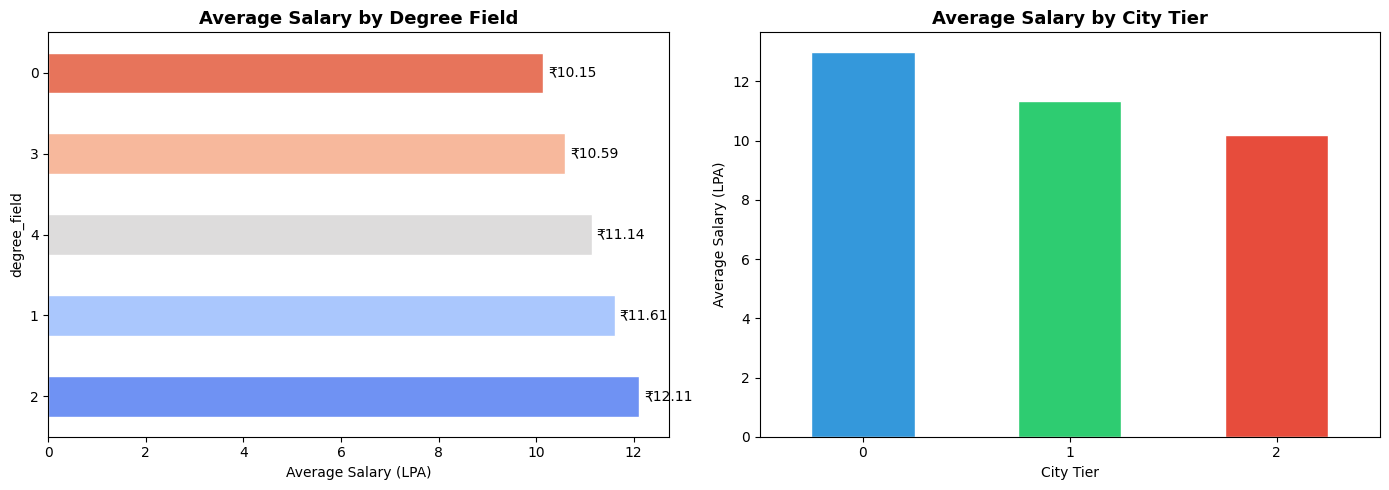

In [34]:
placed_df = df[df['placed'] == 1].copy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Salary by degree field
salary_field = placed_df.groupby('degree_field')['salary_lpa'].mean().sort_values(ascending=False)
salary_field.plot(kind='barh', ax=axes[0], color=sns.color_palette("coolwarm", len(salary_field)), edgecolor='white')
axes[0].set_xlabel('Average Salary (LPA)')
axes[0].set_title('Average Salary by Degree Field', fontsize=13, fontweight='bold')
for i, v in enumerate(salary_field):
    axes[0].text(v + 0.1, i, f'₹{v:.2f}', va='center', fontsize=10)

# Salary by city tier
salary_city = placed_df.groupby('city_tier')['salary_lpa'].mean().sort_values(ascending=False)
salary_city.plot(kind='bar', ax=axes[1], color=['#3498db', '#2ecc71', '#e74c3c'], edgecolor='white')
axes[1].set_xlabel('City Tier')
axes[1].set_ylabel('Average Salary (LPA)')
axes[1].set_title('Average Salary by City Tier', fontsize=13, fontweight='bold')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [35]:
print("=" * 60)
print("📊 KEY INSIGHTS SUMMARY")
print("=" * 60)

print(f"\n🎯 PLACEMENT")
print(f"   • Overall rate: {df['placed'].mean()*100:.1f}%")
print(f"   • Engineering leads with {df[df['degree_field']=='Engineering']['placed'].mean()*100:.1f}% rate")

print(f"\n💰 SALARY")
print(f"   • Range: ₹{placed_df['salary_lpa'].min():.2f} - ₹{placed_df['salary_lpa'].max():.2f} LPA")
print(f"   • Average: ₹{placed_df['salary_lpa'].mean():.2f} LPA")

print(f"\n📈 TOP SUCCESS FACTORS")
top_factors = placement_corr.head(5)
for factor, corr in top_factors.items():
    print(f"   • {factor}: {corr:.3f}")

print(f"\n⚠️ RISK FACTORS")
print(f"   • Backlogs correlation: {placement_corr['backlogs']:.3f}")
print(f"   • Students with 5+ backlogs: {df[df['backlogs']>=5]['placed'].mean()*100:.1f}% placement rate")

print("\n" + "=" * 60)

📊 KEY INSIGHTS SUMMARY

🎯 PLACEMENT
   • Overall rate: 84.4%
   • Engineering leads with nan% rate

💰 SALARY
   • Range: ₹4.15 - ₹24.22 LPA
   • Average: ₹11.50 LPA

📈 TOP SUCCESS FACTORS
   • soft_skills_score: 0.231
   • communication_score: 0.225
   • technical_skills_score: 0.218
   • hsc_percentage: 0.157
   • degree_percentage: 0.151

⚠️ RISK FACTORS
   • Backlogs correlation: -0.264
   • Students with 5+ backlogs: 52.0% placement rate



## Thank you...pls upvote!!!!!